# Topic Model

Modelagem de tópicos do GT-8 Informação e Tecnologia do Encontro Nacional de Pesquisa em Ciência da Informação – ENANCIB.
O corpus foi constituído de 273 documentos dos tipos artigos completos e resumos expandidos coletados entre os anos de 2012 a 2019.

## Bibliotecas utilizadas

In [1]:
import re
from gensim import models, corpora
from nltk import word_tokenize
from nltk.corpus import stopwords

import nltk
from nltk.probability import FreqDist

import csv
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#TRANSFORMAR SIGLAS POPULARES EM PALAVRAS

def conversao_termos(texto):
    texto = re.sub(" abc "," academia brasileira de ciência ",texto.lower())
    texto = re.sub(" ai "," arquitetura da informação ",texto.lower())
    texto = re.sub(" ala "," american library association ",texto.lower())
    texto = re.sub(" ala "," american library association ",texto.lower())
    texto = re.sub(" american society for information science and Technology "," asist ",texto.lower())
    texto = re.sub(" annual review of information science and technology "," arist ",texto.lower())
    texto = re.sub(" aoi "," arquitetura e organização da informação ",texto.lower())
    texto = re.sub(" associação brasileira de educação em ciência da informação "," abecin ",texto.lower())
    texto = re.sub(" associação brasileira de ensino de biblioteconomia e documentação "," abebd ",texto.lower())
    texto = re.sub(" associação brasileira de normas técnicas "," abnt ",texto.lower())
    texto = re.sub(" associação nacional de pesquisa e pós-graduação em ciência da informação "," ancib ",texto.lower())
    texto = re.sub(" base de dados referencial de artigos de periódicos em ciência da informação "," brapci ",texto.lower())
    texto = re.sub(" bci "," biblioteconomia e ciência da informação ",texto.lower())
    texto = re.sub(" biblioteca digital de teses e dissertações "," bdtd ",texto.lower())
    texto = re.sub(" bn "," biblioteca nacional ",texto.lower())
    texto = re.sub(" bu "," biblioteca universitária ",texto.lower())
    texto = re.sub(" c&t "," ciência e tecnologia ",texto.lower())
    texto = re.sub(" cc "," ciência da computação ",texto.lower())
    texto = re.sub(" ccn "," catálogo coletivo nacional ",texto.lower())
    texto = re.sub(" cdd "," classificação decimal de dewey ",texto.lower())
    texto = re.sub(" cdu "," classificação decimal universal ",texto.lower())
    texto = re.sub(" cdu "," classificação decimal universal ",texto.lower())
    texto = re.sub(" cepe "," conselho de extensão e pesquisa ",texto.lower())
    texto = re.sub(" cepe "," conselho de extensão e pesquisa ",texto.lower())
    texto = re.sub(" ci "," ciência da informação ",texto.lower())
    texto = re.sub(" ci:"," ciência da informação ",texto.lower()) 
    texto = re.sub(" ci,"," ciência da informação ",texto.lower())
    texto = re.sub(" cms "," content management system ",texto.lower())
    texto = re.sub(" cne "," conselho nacional de educação ",texto.lower())
    texto = re.sub(" conselho nacional de desenvolvimento científico e tecnológico "," cnpq ",texto.lower())
    texto = re.sub(" coordenação de aperfeiçoamento de pessoal de nível superior "," capes ",texto.lower())
    texto = re.sub(" coordenação de aperfeiçoamento de pessoal de nível superior "," capes ",texto.lower())
    texto = re.sub(" crm "," customer relationship management ",texto.lower())
    texto = re.sub(" dc "," dublin core ",texto.lower())
    texto = re.sub(" descriptive ontology for linguistic and cognitive engineering "," dolce ",texto.lower())
    texto = re.sub(" ead "," educação à distância ",texto.lower())
    texto = re.sub(" eci "," escola de ciência da informação ",texto.lower())
    texto = re.sub(" enade "," exame nacional de desempenho ",texto.lower())
    texto = re.sub(" encontro nacional de pesquisa em ciência da informação "," enancib ",texto.lower())
    texto = re.sub(" fgv "," Fundação Getúlio Vargas ",texto.lower())
    texto = re.sub(" fiocruz "," fundação oswaldo cruz ",texto.lower())
    texto = re.sub(" ftp "," file transfer protocol ",texto.lower())
    texto = re.sub(" fundação brasileira à pesquisa do estudo de minas gerais "," fapemig ",texto.lower())
    texto = re.sub(" fundação brasileira à pesquisa do estudo de são paulo "," fapesp ",texto.lower())
    texto = re.sub(" fundação brasileira à pesquisa do estudo do rio de janeiro "," faperj ",texto.lower())
    texto = re.sub(" fundação de amparo às pesquisas "," faps ",texto.lower())
    texto = re.sub(" gic "," gestão da informação e conhecimento ",str(texto.lower()))
    texto = re.sub(" gic "," gestão da informação e do conhecimento ",texto.lower())
    texto = re.sub(" gpl "," general public licence ",texto.lower())
    texto = re.sub(" hypertext markup language limguagem "," html ",texto.lower())
    texto = re.sub(" ia "," inteligência artificial ",texto.lower())
    texto = re.sub(" ibpc "," instituto brasileiro do patrimônio cultural ",texto.lower())
    texto = re.sub(" ibpc "," instituto brasileiro do patrimônio cultural ",texto.lower())
    texto = re.sub(" ics "," informação cultura e sociedade ",texto.lower())
    texto = re.sub(" ict "," informação, ciência e tecnologia ",texto.lower())
    texto = re.sub(" idh "," índice de desenvolvimento humano ",texto.lower())
    texto = re.sub(" ies "," instituição de ensino superior ",texto.lower())
    texto = re.sub(" information science and technology abstracts "," ista ",texto.lower())
    texto = re.sub(" instituto brasileiro de bibliografia e documentação "," ibbd ",texto.lower())
    texto = re.sub(" instituto brasileiro de geografia e estatística "," ibge ",texto.lower())
    texto = re.sub(" instituto brasileiro de informação em ciência e tecnologia "," ibict ",texto.lower())
    texto = re.sub(" instituto de ciência da informação "," ici ",texto.lower())
    texto = re.sub(" instituto nacional de estudos e pesquisas educacionais anísio teixeira "," inep ",texto.lower())
    texto = re.sub(" instituto universitário de pesquisa do rio de janeiro "," iuoerj ",texto.lower())
    texto = re.sub(" international federation of library associations and institutions "," ifla ",texto.lower())
    texto = re.sub(" international standard book number "," isbn ",texto.lower())
    texto = re.sub(" international standard serial number "," issn ",texto.lower())
    texto = re.sub(" isi "," institute for scientific information ",texto.lower())
    texto = re.sub(" iso "," international organization for standardization ",texto.lower())
    texto = re.sub(" it "," informação e tecnologia ",texto.lower())
    texto = re.sub(" jcr "," journal citation reports ",texto.lower())
    texto = re.sub(" jstor "," journal storage ",texto.lower())
    texto = re.sub(" kos "," sistemas de organização do conhecimento ",texto.lower())
    texto = re.sub(" lc "," linguagem cinzenta ",texto.lower())
    texto = re.sub(" ld "," linguagem documentária ",texto.lower())
    texto = re.sub(" ldb "," lei de diretrizes e bases ",texto.lower())
    texto = re.sub(" library and informations science abstracts "," lisa ",texto.lower())
    texto = re.sub(" ln "," linguagem natural ",texto.lower())
    texto = re.sub(" lod "," linked open data ",texto.lower())
    texto = re.sub(" marc "," machine readable cataloging ",texto.lower())
    texto = re.sub(" mdi "," multiple document interface ",texto.lower())
    texto = re.sub(" mec "," ministério da educação ",texto.lower())
    texto = re.sub(" npd "," núcleo de pesquisa e documentação ",texto.lower())
    texto = re.sub(" oai "," open archives iniciative ",texto.lower())
    texto = re.sub(" oc "," organização do conhecimento ",texto.lower())
    texto = re.sub(" ocr "," optical character recognition ",texto.lower())
    texto = re.sub(" oi "," organização da informação ",texto.lower())
    texto = re.sub(" ojs "," open journal systems ",texto.lower())
    texto = re.sub(" ong "," organização não-governamental ",texto.lower())
    texto = re.sub(" onu "," organização das nações unidas ",texto.lower())
    texto = re.sub(" organização das nações unidas para a educação e cultura "," unesco ",texto.lower())
    texto = re.sub(" osi "," open society institute ",texto.lower())
    texto = re.sub(" oui "," organização e uso da informação ",texto.lower())
    texto = re.sub(" owl "," web ontology language ",texto.lower())
    texto = re.sub(" pln "," processamento de linguagem natural ",texto.lower())
    texto = re.sub(" plos "," public library of science ",texto.lower())
    texto = re.sub(" poi "," produção e organização da informação ",texto.lower())
    texto = re.sub(" pontifícia universidade católica de minas gerais "," puc mg ",texto.lower())
    texto = re.sub(" pontifícia universidade católica de são paulo "," puc sp ",texto.lower())
    texto = re.sub(" pontifícia universidade católica do rio de janeiro "," puc rj ",texto.lower())
    texto = re.sub(" pontifícia universidade católica do rio grande do sul "," puc rs ",texto.lower())
    texto = re.sub(" ppg "," programa de pós-graduação ",texto.lower())
    texto = re.sub(" programa de pós-graduação em ciência da informação "," ppgci ",texto.lower())
    texto = re.sub(" programa de pós-graduação em ciências sociais "," ppgcs ",texto.lower())
    texto = re.sub(" programa de pós-graduação em sociologia "," ppgs ",texto.lower())
    texto = re.sub(" rc "," representação do conhecimento ",texto.lower())
    texto = re.sub(" rdf "," resource description framework ",texto.lower())
    texto = re.sub(" ri "," recuperação da informação ",texto.lower())
    texto = re.sub(" ri "," recuperação da informação ",texto.lower())
    texto = re.sub(" sad "," sistema de apoio à decisão ",texto.lower())
    texto = re.sub(" sci "," science citation index ",texto.lower())
    texto = re.sub(" scientific electronic library online "," scielo",texto.lower())
    texto = re.sub(" sdr "," zona de desenvolvimento real ",texto.lower())
    texto = re.sub(" serviço central de informação bibliográfica "," scib ",texto.lower())
    texto = re.sub(" serviço nacional de aprendizagem comercial "," senac ",texto.lower())
    texto = re.sub(" serviço nacional de aprendizagem industrial "," senai ",texto.lower())
    texto = re.sub(" serviço social da indústria "," sesi ",texto.lower())
    texto = re.sub(" serviço social do comércio "," sesc ",texto.lower())
    texto = re.sub(" sesi "," serviço social da indústria ",texto.lower())
    texto = re.sub(" sibi "," sistema integrado de bibliotecas ",texto.lower())
    texto = re.sub(" sig "," sistema de informação gerencial ",texto.lower())
    texto = re.sub(" snad "," secretária nacional de políticas anti-drogas ",texto.lower())
    texto = re.sub(" snpq "," sistema nacional de pós-graduação",texto.lower())
    texto = re.sub(" soc "," sistemas de organização do conhecimento ",texto.lower())
    texto = re.sub(" sri "," sistema de recuperação da informação ",texto.lower())
    texto = re.sub(" ssd "," sistema de suporte à decisão ",texto.lower())
    texto = re.sub(" tcc "," trabalho de conclusão de curso ",texto.lower())
    texto = re.sub(" universidade federal de minas gerais "," ufmg ",texto.lower())
    texto = re.sub(" universidade federal de ouro preto "," ufop ",texto.lower())
    texto = re.sub(" universidade federal de pernambuco "," ufpe ",texto.lower())
    texto = re.sub(" universidade federal de santa caratina "," ufsc ",texto.lower())
    texto = re.sub(" universidade federal de são carlos "," ufscar ",texto.lower())
    texto = re.sub(" universidade federal de sergipe "," ufs ",texto.lower())
    texto = re.sub(" universidade federal de viçosa "," ufv ",texto.lower())
    texto = re.sub(" universidade federal do ceará "," ufc ",texto.lower())
    texto = re.sub(" universidade federal do estado do rio de janeiro "," unirio ",texto.lower())
    texto = re.sub(" universidade federal do maranhão "," ufma ",texto.lower())
    texto = re.sub(" universidade federal do pará "," ufpa ",texto.lower())
    texto = re.sub(" universidade federal do paraná "," ufpr ",texto.lower())
    texto = re.sub(" universidade federal do rio de janeiro "," ufrj ",texto.lower())
    texto = re.sub(" universidade federal do rio grande do norte "," ufrn ",texto.lower())
    texto = re.sub(" universidade federal do rio grande do sul  "," ufrgs ",texto.lower())
    texto = re.sub(" universidade federal fluminense "," uff ",texto.lower())
    texto = re.sub(" universidade federal rural do rio de janeiro "," ufrrj ",texto.lower())
    texto = re.sub(" uri "," uniform resource identifier ",texto.lower())
    texto = re.sub(" world wide web consortium "," w3c ",texto.lower())
    texto = re.sub(" xml "," extensible markup language ",texto.lower())
    texto = re.sub(" zpd "," zona de desenvolvimento proximal ",texto.lower())
    texto = re.sub("-se", "", texto.lower())
    texto = re.sub(" se ", "", texto.lower())
    return texto

In [3]:
#CONFIGURANDO STOP_WORDS PARA PORTUGUÊS

stop_words = set(stopwords.words('portuguese'))
stop_words_us =  set(stopwords.words('english'))

#ADICIONAR INSERÇÕES DE PALAVRAS DE PARADA
new_stopwords = ['é','onde','senão','quanto','outros','sobre','ser','ainda','quais','desse','assim','tal','podemos','portanto','pode',
                 'tanto','alguns','possível','p.','v','p','-se','se',' se''nesse','nessa','neste','nesta','http','disponível','acesso',
                 'sendo','enancib','marília', 'rio','universidade','federal','dessa','estadual','diz','respeito','finais','considerações',
                 'desta','belo horizointe','janeiro','fevereiro','março','abril','maio','junho','julho','agosto','setembro','outubro',
                 'novembro','dezembro','porto alegre','outro','xix','londrina','paulista','xvii']

stop_words.update(new_stopwords)
stop_words.update(stop_words_us)
new_stopwords_list = set(stop_words)

In [4]:
#SETAR DOCUMENTO A SER LIDO

#CAMINHO DO ARQUIVO
data = []
pasta = "/corpus_gt08"
caminho="C:/Users/Marcos/tese/corpus/enancib" + pasta

arquivo = open(caminho + ".txt", "r",encoding="utf-8")

In [5]:
#LEITURA DO CORPUS

x=0
for fileid in arquivo:
    document = fileid
    document = conversao_termos(document)

#    document=re.sub(" encontro nacional de pesquisa em ciência da informação "," enancib ",str(document.lower()))
    data.append(document)

NO_DOCUMENTS = len(data)
print(NO_DOCUMENTS)

273


In [6]:
#RESULTADO PARA VERIFICAÇÃO DE CONVERSÃO DE SIGLAS E LEITURA DE TEXTO CONTIDO NO CORPUS

print(data[1])

['xiii enancib - xiii enancib 2012      gt 8: informação e tecnologia          avaliação do desempenho de uma ferramenta automatizada de busca que utiliza como descritores as expressões multipalavras.           comunicação oral  edson marchetti da silva - centro federal de educação tecnológica de minas gerais renato rocha souza - fundação getulio vargas  rsouza.fgv@gmail.com                     2012 \x0cavaliação do desempenho de uma ferramenta automatizada de busca que utili-za como descritores as expressões multipalavras.    resumo   este trabalho visa testar um método alternativo para recuperação de documentos através do uso de expressões multipalavras (em) extraídas de um documento base, para se-rem utilizadas como descritores de busca em um sistema de recuperação da informação (sri). neste sentido, diferentemente dos métodos que consideram o texto como um conjunto de palavras, do inglês bag of words, utilizamos um método que leva em consideração as ca-racterísticas da estrutura fí

In [7]:
#FUNÇÃO BIGRAMA E TRIGRAMA

def bigramas(words):
 
    bigrams = []
 
    for i in range(0, len(words)):
        if (i == len(words)-1):
            break
        else:
            bigrama_obs = words[i] + '_' + words[i+1]
            bigrams.append(bigrama_obs)
 
    return bigrams

def trigramas(words):
 
    trigrams = []
 
    for i in range(0, len(words)):
        if (i == len(words)-2):
            break
        else:
            trigrama_obs = words[i] + '_' + words[i+1] + '_' + words[i+2]
            trigrams.append(trigrama_obs)
 
    return trigrams

In [8]:
# TOKENIZAR O DOCUMENTO E FAZER A STOPWORDS

def clean_text(text):
    tokenized_text = word_tokenize(text.lower())
    cleaned_text = [t for t in tokenized_text if t not in stop_words and re.match('[a-zA-Z\-][a-zA-Z\-]{2,}', t)]
    return cleaned_text
 
tokenized_data = []
texto2 = []
total_unigramas = []
total_bigramas = []
total_trigramas = []

for text in data:
    xtexto = clean_text(text)

#CRIAR O UNIGRAMA, BIGRAMAS, TRIGRAMAS
    unigramas = xtexto
    xbigramas = bigramas(xtexto)
    xtrigramas = trigramas(xtexto)
    xunigramas = unigramas + xbigramas + xtrigramas
    
    tokenized_data.append(xunigramas)
    texto2 = texto2 + xunigramas

#CRIAR OPÇÃO PARA MOSTRAR A FREQUENCIA SOMENTE DE UNIGRAMA , BIGRAMAS E TRIGRAMAS
    total_unigramas = total_unigramas + unigramas
    total_bigramas = total_bigramas + xbigramas
    total_trigramas = total_trigramas + xtrigramas
    
xfrequencia = texto2

In [9]:
#TOTAL DE UNIGRAMAS, BIGRAMAS E TRIGRAMAS
print("Total de Unigramas: "+ str((len(total_unigramas))))
print("Total de Bigramas: "+ str((len(total_bigramas))))
print("Total de Trigramas: "+ str((len(total_trigramas))))

Total de Unigramas: 940925
Total de Bigramas: 940652
Total de Trigramas: 940379


In [ ]:
#CELULA EXTRA - VERIFICAR TEXTO TOKENIZADO
print(tokenized_data[1])

# CRIANDO A FREQUÊNCIA

In [23]:
#MOSTRA A FREQUENCIA EM ORDEM - FREQUENCIA GERAL
num_freq = 450
fdist = FreqDist(xfrequencia)
fdist.pprint(num_freq)
xfreq = fdist
nome_arquivo = "freq_geral"

#GUARDA EM UM CSV A FREQUENCIA GERAL 
import csv
# GUARDA O CORPUS EM UM CSV SEPARADO POR TABULAÇÃO
with open(nome_arquivo + ".csv", "w", newline='') as fp:
    writer = csv.writer(fp,delimiter = ',')
    writer.writerows(fdist.most_common(num_freq))

#MOSTRA AS FREQUÊNCIAS POR LINHA
print("\n  PALAVRA -- FREQUÊNCIA")
fdist.most_common(num_freq)

FreqDist({'informação': 16061, 'dados': 9927, 'pesquisa': 5190, 'web': 5114, 'digital': 4025, 'informações': 3887, 'uso': 3575, 'metadados': 3447, 'usuários': 3416, 'forma': 3410, 'digitais': 3091, 'data': 2982, 'information': 2911, 'sistemas': 2760, 'conhecimento': 2727, 'sistema': 2586, 'busca': 2539, 'usuário': 2535, 'processo': 2503, 'documentos': 2409, 'modelo': 2404, 'recuperação': 2365, 'partir': 2309, 'meio': 2291, 'recursos': 2277, 'tecnologia': 2198, 'conteúdo': 2119, 'podem': 2068, 'cada': 2067, 'bibliotecas': 2061, 'preservação': 1975, 'comunicação': 1895, 'desenvolvimento': 1840, 'figura': 1829, 'contexto': 1774, 'informacionais': 1745, 'arquitetura': 1739, 'resultados': 1738, 'tecnologias': 1698, 'semântica': 1698, 'gestão': 1694, 'fonte': 1683, 'estudo': 1682, 'base': 1677, 'repositórios': 1665, 'organização': 1661, 'ambientes': 1635, 'trabalho': 1622, 'representação': 1537, 'sociais': 1482, 'ambiente': 1477, 'conjunto': 1433, 'termos': 1426, 'avaliação': 1410, 'relação'

[('informação', 16061),
 ('dados', 9927),
 ('pesquisa', 5190),
 ('web', 5114),
 ('digital', 4025),
 ('informações', 3887),
 ('uso', 3575),
 ('metadados', 3447),
 ('usuários', 3416),
 ('forma', 3410),
 ('digitais', 3091),
 ('data', 2982),
 ('information', 2911),
 ('sistemas', 2760),
 ('conhecimento', 2727),
 ('sistema', 2586),
 ('busca', 2539),
 ('usuário', 2535),
 ('processo', 2503),
 ('documentos', 2409),
 ('modelo', 2404),
 ('recuperação', 2365),
 ('partir', 2309),
 ('meio', 2291),
 ('recursos', 2277),
 ('tecnologia', 2198),
 ('conteúdo', 2119),
 ('podem', 2068),
 ('cada', 2067),
 ('bibliotecas', 2061),
 ('preservação', 1975),
 ('comunicação', 1895),
 ('desenvolvimento', 1840),
 ('figura', 1829),
 ('contexto', 1774),
 ('informacionais', 1745),
 ('arquitetura', 1739),
 ('resultados', 1738),
 ('tecnologias', 1698),
 ('semântica', 1698),
 ('gestão', 1694),
 ('fonte', 1683),
 ('estudo', 1682),
 ('base', 1677),
 ('repositórios', 1665),
 ('organização', 1661),
 ('ambientes', 1635),
 ('trab

In [11]:
#MOSTRA A FREQUENCIA EM ORDEM - FREQUENCIA UNIGRAMA
num_freq = 150
fdist = FreqDist(total_unigramas)
fdist.pprint(num_freq)
xfreq = fdist
nome_arquivo = "freq_unigrama"

#GUARDA EM UM CSV A FREQUENCIA GERAL 
import csv
# GUARDA O CORPUS EM UM CSV SEPARADO POR TABULAÇÃO
with open(nome_arquivo + ".csv", "w", newline='') as fp:
    writer = csv.writer(fp,delimiter = ',')
    writer.writerows(fdist.most_common(num_freq))

#MOSTRA AS FREQUÊNCIAS POR LINHA
print("\n  PALAVRA -- FREQUÊNCIA")
fdist.most_common(num_freq)

FreqDist({'informação': 16061, 'dados': 9927, 'pesquisa': 5190, 'web': 5114, 'digital': 4025, 'informações': 3887, 'uso': 3575, 'metadados': 3447, 'usuários': 3416, 'forma': 3410, 'digitais': 3091, 'data': 2982, 'information': 2911, 'sistemas': 2760, 'conhecimento': 2727, 'sistema': 2586, 'busca': 2539, 'usuário': 2535, 'processo': 2503, 'documentos': 2409, 'modelo': 2404, 'recuperação': 2365, 'partir': 2309, 'meio': 2291, 'recursos': 2277, 'tecnologia': 2198, 'conteúdo': 2119, 'podem': 2068, 'cada': 2067, 'bibliotecas': 2061, 'preservação': 1975, 'comunicação': 1895, 'desenvolvimento': 1840, 'figura': 1829, 'contexto': 1774, 'informacionais': 1745, 'arquitetura': 1739, 'resultados': 1738, 'tecnologias': 1698, 'semântica': 1698, 'gestão': 1694, 'fonte': 1683, 'estudo': 1682, 'base': 1677, 'repositórios': 1665, 'organização': 1661, 'ambientes': 1635, 'trabalho': 1622, 'representação': 1537, 'sociais': 1482, 'ambiente': 1477, 'conjunto': 1433, 'termos': 1426, 'avaliação': 1410, 'relação'

[('informação', 16061),
 ('dados', 9927),
 ('pesquisa', 5190),
 ('web', 5114),
 ('digital', 4025),
 ('informações', 3887),
 ('uso', 3575),
 ('metadados', 3447),
 ('usuários', 3416),
 ('forma', 3410),
 ('digitais', 3091),
 ('data', 2982),
 ('information', 2911),
 ('sistemas', 2760),
 ('conhecimento', 2727),
 ('sistema', 2586),
 ('busca', 2539),
 ('usuário', 2535),
 ('processo', 2503),
 ('documentos', 2409),
 ('modelo', 2404),
 ('recuperação', 2365),
 ('partir', 2309),
 ('meio', 2291),
 ('recursos', 2277),
 ('tecnologia', 2198),
 ('conteúdo', 2119),
 ('podem', 2068),
 ('cada', 2067),
 ('bibliotecas', 2061),
 ('preservação', 1975),
 ('comunicação', 1895),
 ('desenvolvimento', 1840),
 ('figura', 1829),
 ('contexto', 1774),
 ('informacionais', 1745),
 ('arquitetura', 1739),
 ('resultados', 1738),
 ('tecnologias', 1698),
 ('semântica', 1698),
 ('gestão', 1694),
 ('fonte', 1683),
 ('estudo', 1682),
 ('base', 1677),
 ('repositórios', 1665),
 ('organização', 1661),
 ('ambientes', 1635),
 ('trab

In [12]:
#MOSTRA A FREQUENCIA EM ORDEM - FREQUENCIA BIGRAMA
num_freq = 150
fdist = FreqDist(total_bigramas)
fdist.pprint(num_freq)
xfreq = fdist
nome_arquivo = "freq_bigrama"

#GUARDA EM UM CSV A FREQUENCIA GERAL 
import csv
# GUARDA O CORPUS EM UM CSV SEPARADO POR TABULAÇÃO
with open(nome_arquivo + ".csv", "w", newline='') as fp:
    writer = csv.writer(fp,delimiter = ',')
    writer.writerows(fdist.most_common(num_freq))

#MOSTRA AS FREQUÊNCIAS POR LINHA
print("\n  PALAVRA -- FREQUÊNCIA")
fdist.most_common(num_freq)

FreqDist({'recuperação_informação': 1359, 'arquitetura_informação': 1264, 'informação_tecnologia': 1039, 'web_semântica': 923, 'big_data': 690, 'preservação_digital': 686, 'redes_sociais': 628, 'ambientes_informacionais': 589, 'linked_data': 577, 'resource_description': 525, 'description_framework': 495, 'information_science': 488, 'dados_pesquisa': 481, 'bases_dados': 458, 'informação_comunicação': 454, 'sistemas_informação': 454, 'encontrabilidade_informação': 406, 'base_dados': 403, 'tecnologias_informação': 392, 'informacionais_digitais': 388, 'repositórios_digitais': 385, 'dublin_core': 378, 'padrões_metadados': 371, 'international_organization': 361, 'markup_language': 358, 'organization_standardization': 356, 'repositórios_institucionais': 356, 'machine_readable': 355, 'cada_vez': 352, 'readable_cataloging': 349, 'dados_abertos': 332, 'ciclo_vida': 332, 'recursos_informacionais': 331, 'extensible_markup': 328, 'objetos_digitais': 324, 'organização_informação': 313, 'nesse_sentid

[('recuperação_informação', 1359),
 ('arquitetura_informação', 1264),
 ('informação_tecnologia', 1039),
 ('web_semântica', 923),
 ('big_data', 690),
 ('preservação_digital', 686),
 ('redes_sociais', 628),
 ('ambientes_informacionais', 589),
 ('linked_data', 577),
 ('resource_description', 525),
 ('description_framework', 495),
 ('information_science', 488),
 ('dados_pesquisa', 481),
 ('bases_dados', 458),
 ('informação_comunicação', 454),
 ('sistemas_informação', 454),
 ('encontrabilidade_informação', 406),
 ('base_dados', 403),
 ('tecnologias_informação', 392),
 ('informacionais_digitais', 388),
 ('repositórios_digitais', 385),
 ('dublin_core', 378),
 ('padrões_metadados', 371),
 ('international_organization', 361),
 ('markup_language', 358),
 ('organization_standardization', 356),
 ('repositórios_institucionais', 356),
 ('machine_readable', 355),
 ('cada_vez', 352),
 ('readable_cataloging', 349),
 ('dados_abertos', 332),
 ('ciclo_vida', 332),
 ('recursos_informacionais', 331),
 ('ext

In [13]:
#MOSTRA A FREQUENCIA EM ORDEM - FREQUENCIA TRIGRAMA
num_freq = 150
fdist = FreqDist(total_trigramas)
fdist.pprint(num_freq)
xfreq = fdist
nome_arquivo = "freq_trigrama"

#GUARDA EM UM CSV A FREQUENCIA GERAL 
import csv
# GUARDA O CORPUS EM UM CSV SEPARADO POR TABULAÇÃO
with open(nome_arquivo + ".csv", "w", newline='') as fp:
    writer = csv.writer(fp,delimiter = ',')
    writer.writerows(fdist.most_common(num_freq))

#MOSTRA AS FREQUÊNCIAS POR LINHA
print("\n  PALAVRA -- FREQUÊNCIA")
fdist.most_common(num_freq)

FreqDist({'resource_description_framework': 493, 'ambientes_informacionais_digitais': 359, 'international_organization_standardization': 356, 'machine_readable_cataloging': 349, 'extensible_markup_language': 325, 'tecnologias_informação_comunicação': 322, 'arquitetura_informação_pervasiva': 218, 'fonte_elaborado_autores': 197, 'livros_didáticos_digitais': 192, 'sistemas_recuperação_informação': 158, 'tese_doutorado_informação': 148, 'linked_open_data': 148, 'world_wide_web': 146, 'gestão_arquivística_documentos': 146, 'sistema_recuperação_informação': 139, 'conselho_nacional_arquivos': 126, 'uniform_resource_identifier': 121, 'dissertação_mestrado_informação': 119, 'nacional_pesquisa_informação': 116, 'fonte_dados_pesquisa': 116, 'encontro_nacional_pesquisa': 115, 'modalidade_apresentação_comunicação': 113, 'apresentação_comunicação_oral': 113, 'informação_faculdade_filosofia': 104, 'souza_santos_silva': 99, 'comunicação_oral_resumo': 97, 'informação_comunicação_tic': 82, 'web_ontology

[('resource_description_framework', 493),
 ('ambientes_informacionais_digitais', 359),
 ('international_organization_standardization', 356),
 ('machine_readable_cataloging', 349),
 ('extensible_markup_language', 325),
 ('tecnologias_informação_comunicação', 322),
 ('arquitetura_informação_pervasiva', 218),
 ('fonte_elaborado_autores', 197),
 ('livros_didáticos_digitais', 192),
 ('sistemas_recuperação_informação', 158),
 ('tese_doutorado_informação', 148),
 ('linked_open_data', 148),
 ('world_wide_web', 146),
 ('gestão_arquivística_documentos', 146),
 ('sistema_recuperação_informação', 139),
 ('conselho_nacional_arquivos', 126),
 ('uniform_resource_identifier', 121),
 ('dissertação_mestrado_informação', 119),
 ('nacional_pesquisa_informação', 116),
 ('fonte_dados_pesquisa', 116),
 ('encontro_nacional_pesquisa', 115),
 ('modalidade_apresentação_comunicação', 113),
 ('apresentação_comunicação_oral', 113),
 ('informação_faculdade_filosofia', 104),
 ('souza_santos_silva', 99),
 ('comunicaçã

## Gráfico

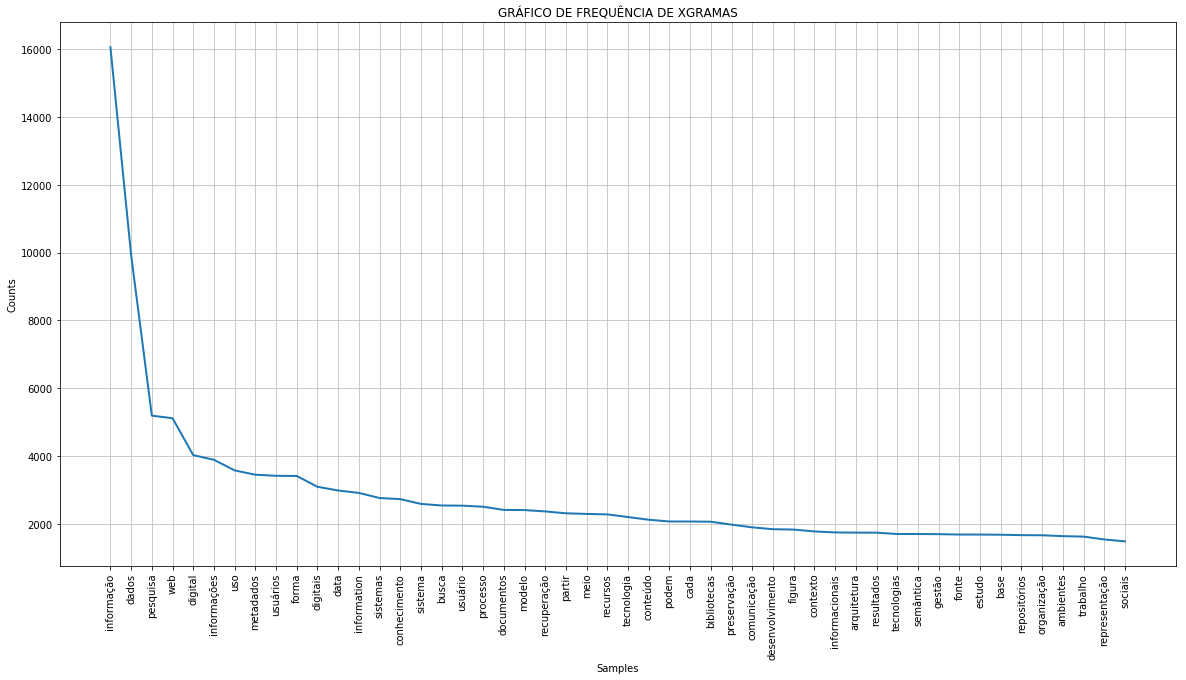

In [14]:
# MOSTRAR O GRÁFICO 

num_freq = 50
#fdist.figure(figsize=(30, 20))
arquivo_grafico = xfrequencia #mudar a variável para representações xgramas v1: total_unigramas v2: total_bigramas v3: total_trigramas v4: xfrequencia
fdist = FreqDist(arquivo_grafico)

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(20,10)) 
fdist.plot(num_freq,cumulative=False,title='GRÁFICO DE FREQUÊNCIA DE XGRAMAS')

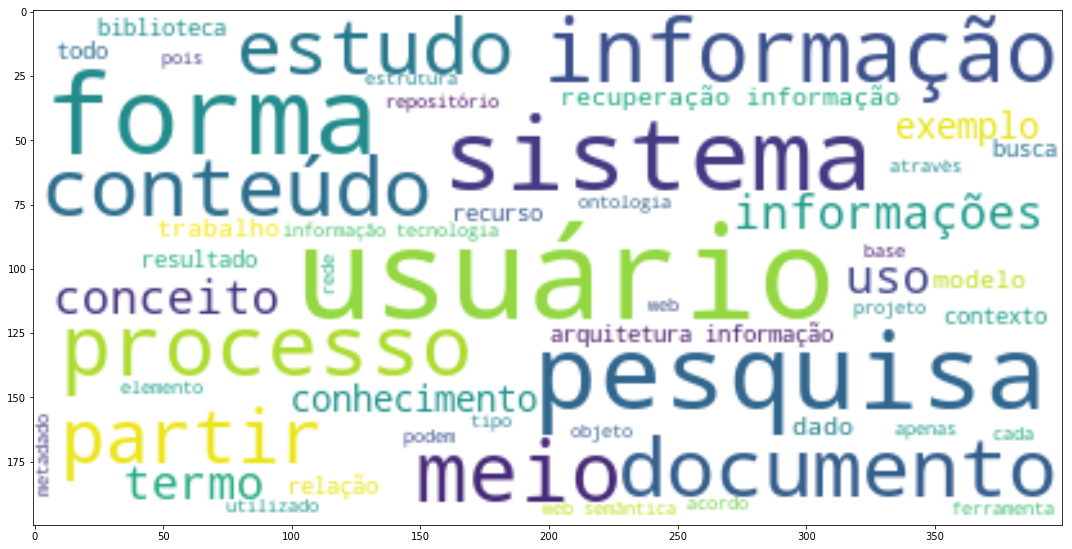

In [21]:
#NUVEM DE PALAVRAS

from wordcloud import WordCloud
cleaned =  ' '.join(total_unigramas)
num_freq = 50
wordcloud = WordCloud(max_font_size=50, max_words=num_freq, background_color="white").generate(cleaned)
fig, ax = plt.subplots(figsize=(15, 20))
ax.imshow(wordcloud, interpolation='nearest')
plt.imshow(wordcloud, interpolation="bilinear")
plt.tight_layout()
plt.savefig("img/corpus_gt08_nuv.png", format = "png")

# CRIANDO O DICIONÁRIO E O CORPUS

In [16]:
#CRIAR DICIONÁRIO 
dictionary = corpora.Dictionary(tokenized_data)
 
#TRANSFORMAR A COLEÇÃO TEXTO COM ID
corpus = [dictionary.doc2bow(text) for text in tokenized_data]

### LDA

In [17]:
print("=========================================== Modelo LDA: 06 TÓPICOS ==================================================\n")
num_topics = 6

chunksize = 1000
passes = 40
iterations = 600
eval_every = None  # Don't evaluate model perplexity, takes too much time.
%time model = models.LdaModel(corpus=corpus, id2word=dictionary, chunksize=chunksize, \
                       alpha='auto', eta='auto', \
                       iterations=iterations, num_topics=num_topics, \
                       passes=passes, eval_every=eval_every)

for idx in range(num_topics):
    print("Tópico %s: " % idx, model.print_topic(idx, 10))

print("=========================================== Modelo LDA: 08 TÓPICOS ==================================================\n")
num_topics = 8

chunksize = 1000
passes = 40
iterations = 600
eval_every = None  # Don't evaluate model perplexity, takes too much time.
%time model = models.LdaModel(corpus=corpus, id2word=dictionary, chunksize=chunksize, \
                       alpha='auto', eta='auto', \
                       iterations=iterations, num_topics=num_topics, \
                       passes=passes, eval_every=eval_every)

for idx in range(num_topics):
    print("Tópico %s: " % idx, model.print_topic(idx, 10))

print("=========================================== Modelo LDA: 10 TÓPICOS ==================================================\n")
num_topics = 10

chunksize = 1000
passes = 40
iterations = 600
eval_every = None  # Don't evaluate model perplexity, takes too much time.
%time model = models.LdaModel(corpus=corpus, id2word=dictionary, chunksize=chunksize, \
                       alpha='auto', eta='auto', \
                       iterations=iterations, num_topics=num_topics, \
                       passes=passes, eval_every=eval_every)

for idx in range(num_topics):
    print("Tópico %s: " % idx, model.print_topic(idx, 10))

print("=========================================== Modelo LDA: 12 TÓPICOS ==================================================\n")
num_topics = 12

chunksize = 1000
passes = 40
iterations = 600
eval_every = None  # Don't evaluate model perplexity, takes too much time.
%time model = models.LdaModel(corpus=corpus, id2word=dictionary, chunksize=chunksize, \
                       alpha='auto', eta='auto', \
                       iterations=iterations, num_topics=num_topics, \
                       passes=passes, eval_every=eval_every)

for idx in range(num_topics):
    print("Tópico %s: " % idx, model.print_topic(idx, 10))
 
print("=========================================== Modelo LDA: 14 TÓPICOS ==================================================\n")
num_topics = 14

chunksize = 1000
passes = 40
iterations = 600
eval_every = None  # Don't evaluate model perplexity, takes too much time.
%time model = models.LdaModel(corpus=corpus, id2word=dictionary, chunksize=chunksize, \
                       alpha='auto', eta='auto', \
                       iterations=iterations, num_topics=num_topics, \
                       passes=passes, eval_every=eval_every)

for idx in range(num_topics):
    print("Tópico %s: " % idx, model.print_topic(idx, 10))

print("=========================================== Modelo LDA: 16 TÓPICOS ==================================================\n")
num_topics = 16

chunksize = 1000
passes = 40
iterations = 600
eval_every = None  # Don't evaluate model perplexity, takes too much time.
%time model = models.LdaModel(corpus=corpus, id2word=dictionary, chunksize=chunksize, \
                       alpha='auto', eta='auto', \
                       iterations=iterations, num_topics=num_topics, \
                       passes=passes, eval_every=eval_every)

for idx in range(num_topics):
    print("Tópico %s: " % idx, model.print_topic(idx, 10))


=========================================== Modelo LDA: 06 TÓPICOS ==================================================

Wall time: 25min 36s
Tópico 0:  0.002*"informação" + 0.001*"processo" + 0.001*"pesquisa" + 0.001*"palavras" + 0.001*"documentos" + 0.000*"metadados" + 0.000*"busca" + 0.000*"forma" + 0.000*"web" + 0.000*"conteúdo"
Tópico 1:  0.007*"informação" + 0.003*"dados" + 0.002*"web" + 0.002*"pesquisa" + 0.001*"informações" + 0.001*"uso" + 0.001*"information" + 0.001*"usuários" + 0.001*"forma" + 0.001*"data"
Tópico 2:  0.002*"informação" + 0.002*"digital" + 0.001*"preservação" + 0.001*"repositórios" + 0.001*"digitais" + 0.001*"pesquisa" + 0.001*"repositório" + 0.001*"documentos" + 0.001*"uso" + 0.001*"dados"
Tópico 3:  0.005*"dados" + 0.002*"informação" + 0.001*"pesquisa" + 0.001*"metadados" + 0.001*"data" + 0.001*"web" + 0.001*"recursos" + 0.001*"informações" + 0.001*"uso" + 0.001*"forma"
Tópico 4:  0.001*"dados" + 0.001*"informação" + 0.001*"digital" + 0.001*"pesquisa" + 0.001*

Tópico 2:  0.000*"dark" + 0.000*"web" + 0.000*"dark_web" + 0.000*"ciberespaço" + 0.000*"lugares" + 0.000*"lugar" + 0.000*"ambiente_informacional" + 0.000*"eleitoral" + 0.000*"ambiente" + 0.000*"augé"
Tópico 3:  0.004*"informação" + 0.003*"digital" + 0.002*"preservação" + 0.002*"dados" + 0.001*"pesquisa" + 0.001*"digitais" + 0.001*"informações" + 0.001*"conhecimento" + 0.001*"inovação" + 0.001*"curadoria"
Tópico 4:  0.003*"informação" + 0.002*"dados" + 0.002*"usuários" + 0.002*"web" + 0.001*"pesquisa" + 0.001*"metadados" + 0.001*"digital" + 0.001*"forma" + 0.001*"conhecimento" + 0.001*"busca"
Tópico 5:  0.004*"dados" + 0.003*"web" + 0.002*"informação" + 0.001*"data" + 0.001*"usuários" + 0.001*"pesquisa" + 0.001*"recursos" + 0.001*"informações" + 0.001*"sociais" + 0.001*"uso"
Tópico 6:  0.003*"dados" + 0.002*"informação" + 0.002*"pesquisa" + 0.001*"digitais" + 0.001*"digital" + 0.001*"repositório" + 0.001*"informações" + 0.001*"repositórios" + 0.001*"web" + 0.001*"uso"
Tópico 7:  0.002*"

In [18]:
#IMPRESSÃO DO MELHOR RESULTADO
print("=========================================== Modelo LDA: XX TÓPICOS ==================================================\n")
num_topics = 10 

chunksize = 1000
passes = 40
iterations = 600
eval_every = None  # Don't evaluate model perplexity, takes too much time.
%time model = models.LdaModel(corpus=corpus, id2word=dictionary, chunksize=chunksize, \
                       alpha='auto', eta='auto', \
                       iterations=iterations, num_topics=num_topics, \
                       passes=passes, eval_every=eval_every)

for idx in range(num_topics):
    print("Tópico %s: " % idx, model.print_topic(idx, 10))

=========================================== Modelo LDA: XX TÓPICOS ==================================================

Wall time: 47min 27s
Tópico 0:  0.006*"informação" + 0.002*"digital" + 0.001*"digitais" + 0.001*"usuários" + 0.001*"arquitetura" + 0.001*"pesquisa" + 0.001*"informações" + 0.001*"arquitetura_informação" + 0.001*"preservação" + 0.001*"uso"
Tópico 1:  0.001*"informação" + 0.001*"los" + 0.001*"sociais" + 0.001*"redes" + 0.001*"bibliotecas" + 0.001*"digital" + 0.001*"redes_sociais" + 0.001*"comunicação" + 0.001*"dados" + 0.001*"sublimação"
Tópico 2:  0.001*"dados" + 0.001*"informação" + 0.001*"cada" + 0.001*"qualidade" + 0.001*"data" + 0.000*"publicações" + 0.000*"artigos" + 0.000*"corpus" + 0.000*"conhecimento" + 0.000*"categorização"
Tópico 3:  0.003*"informação" + 0.002*"dados" + 0.001*"informações" + 0.001*"web" + 0.001*"pesquisa" + 0.001*"documentos" + 0.001*"requisitos" + 0.001*"busca" + 0.001*"memória" + 0.001*"uso"
Tópico 4:  0.006*"dados" + 0.003*"web" + 0.002*"da

### PyLDAvis

In [22]:
#IMPORTAR BIBLIOTECA PARA VISUALIZAÇÃO DOS TÓPICOS LDA
import pyLDAvis
import pyLDAvis.gensim  
import matplotlib.pyplot as plt
%matplotlib inline

In [24]:
#VISUALIZAR NO GRÁFICO PYLDAVIS
pyLDAvis.enable_notebook()
%time vis = pyLDAvis.gensim.prepare(model, corpus, dictionary)
pyLDAvis.save_html(vis, 'lda.html')
vis

Wall time: 3min 15s


PreparedData(topic_coordinates=            Freq  cluster  topics         x         y
topic                                                
6      40.486317        1       1 -0.209435  0.050043
9      13.341586        1       2 -0.016012 -0.116982
7      11.237357        1       3 -0.036624 -0.025966
0       9.447891        1       4  0.003152 -0.095808
4       7.881377        1       5  0.018120  0.062019
8       7.268117        1       6  0.020289  0.011911
3       3.317203        1       7  0.041697  0.025151
5       3.026130        1       8  0.036696  0.024238
1       2.174863        1       9  0.069105  0.030567
2       1.819153        1      10  0.073012  0.034827, topic_info=       Category          Freq                    Term         Total  loglift  \
term                                                                           
2108    Default   7704.000000                   dados   7704.000000  30.0000   
3938    Default  12943.000000              informação  12943.000000  29.0000   
2168    Default   2293.000000                    data   2293.000000  28.0000   
8086    Default   4113.000000                     web   4113.000000  27.0000   
4849    Default   2802.000000               metadados   2802.000000  26.0000   
2442    Default   3243.000000                 digital   3243.000000  25.0000   
952     Default   1623.000000             bibliotecas   1623.000000  24.0000   
3985    Default   3034.000000             informações   3034.000000  23.0000   
7233    Default   1147.000000                 sociais   1147.000000  22.0000   
5605    Default   4164.000000                pesquisa   4164.000000  21.0000   
92600   Default    590.000000                     big    590.000000  20.0000   
6450    Default    792.000000                   redes    792.000000  19.0000   
2598    Default   1892.000000              documentos   1892.000000  18.0000   
6947    Default   1336.000000               semântica   1336.000000  17.0000   
11439   Default    632.000000               indexação    632.000000  16.0000   
92601   Default    521.000000                big_data    521.000000  15.0000   
24419   Default    588.000000                  linked    588.000000  14.0000   
3310    Default   2692.000000                   forma   2692.000000  13.0000   
5975    Default   1952.000000                processo   1952.000000  12.0000   
6575    Default   1324.000000            repositórios   1324.000000  11.0000   
20956   Default   1054.000000  arquitetura_informação   1054.000000  10.0000   
1802    Default   2153.000000            conhecimento   2153.000000   9.0000   
2407    Default   2489.000000                digitais   2489.000000   8.0000   
6413    Default   1902.000000             recuperação   1902.000000   7.0000   
4892    Default   1896.000000                  modelo   1896.000000   6.0000   
19289   Default    647.000000              requisitos    647.000000   5.0000   
22532   Default    367.000000                 e-books    367.000000   4.0000   
1108    Default   1609.000000                    cada   1609.000000   3.0000   
117397  Default    430.000000             linked_data    430.000000   2.0000   
19048   Default    592.000000               qualidade    592.000000   1.0000   
...         ...           ...                     ...           ...      ...   
540685  Topic10      7.059631          data_analytics     27.116272   2.6611   
6235    Topic10     21.948074             publicações    458.537842   0.9674   
266891  Topic10     10.424383              currículos     74.613708   2.0386   
14675   Topic10     11.036138              algoritmos     89.531624   1.9134   
563     Topic10     21.842400                 artigos    550.464844   0.7799   
1108    Topic10     31.729822                    cada   1609.152344   0.0806   
9232    Topic10     18.181969           classificação    427.418701   0.8495   
16159   Topic10     12.972996               dimensões    158.989487   1.5008   
3938    Topic10     44.031101